In [ ]:
import pandas as pd
import numpy as np

# Data frame film oriented

In [ ]:
#'tconst', 'isAdult', 'startYear',
#'runtimeMinutes', 'genre_1', 'genre_2', 'genre_3', 'directors', 'title',
#'averageRating', 'numVotes'

## Title_basics

In [ ]:
# Import bdd
df_title_basics = df_title_basics = pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", sep = '\t')

<ipython-input-3-2c31b9e37fc6>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics = df_title_basics = pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", sep = '\t')


In [ ]:
# Delete column "endYear"
df_title_basics.drop("endYear", axis=1, inplace=True)

In [ ]:
# Delete rows where genre != "movie"
df_title_basics = df_title_basics.loc[df_title_basics["titleType"] == "movie", :]

In [ ]:
# We can now delete "titleType" column
df_title_basics.drop("titleType", axis=1, inplace=True)

<ipython-input-6-3698df44ae5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_basics.drop("titleType", axis=1, inplace=True)


In [ ]:
# Checking Nan values
df_title_basics.isna().sum()
## No Nan values

tconst            0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

In [ ]:
# Checking columns type
def get_unique_column_types(df, col_name):
    """
    Returns a list of the unique types of values in the specified column of the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column.
    col_name (str): The name of the column to check.

    Returns:
    list: A list of the unique types of values in the column.
    """
    unique_types = df[col_name].apply(type).unique()
    return unique_types

# List of column names in the DataFrame
column_names = df_title_basics.columns.tolist()

# Iterate over each column name and print the unique types of values in that column
for col_name in column_names:
    types = get_unique_column_types(df_title_basics, col_name)
    print(f"The column '{col_name}' has the following unique types of values: {types}")

The column 'tconst' has the following unique types of values: [<class 'str'>]
The column 'primaryTitle' has the following unique types of values: [<class 'str'>]
The column 'originalTitle' has the following unique types of values: [<class 'str'>]
The column 'isAdult' has the following unique types of values: [<class 'int'> <class 'str'>]
The column 'startYear' has the following unique types of values: [<class 'str'>]
The column 'runtimeMinutes' has the following unique types of values: [<class 'str'>]
The column 'genres' has the following unique types of values: [<class 'str'>]


In [ ]:
# Convert "startYear" as int for using as condition
# Delete rows where "starYear" value is not convertible to int

# convert everything to numeric value and give Nan values when it's not possible
df_title_basics["startYear"] = pd.to_numeric(df_title_basics["startYear"], errors='coerce')
df_title_basics = df_title_basics.dropna(subset=["startYear"])
# convert to int because I don't want floats
df_title_basics["startYear"] = df_title_basics["startYear"].astype(int)

<ipython-input-9-f6dde0e15937>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_basics["startYear"] = df_title_basics["startYear"].astype(int)


In [ ]:
# Split the column "genres"
split_genre = df_title_basics["genres"].str.split(",", expand=True)
split_genre.rename(columns={0 : "genre_1", 1 : "genre_2", 2 : "genre_3"}, inplace=True)

df_title_basics = pd.concat([df_title_basics, split_genre], axis=1)


In [ ]:
# Drop column "genres" because unusable
df_title_basics.drop("genres", axis=1, inplace=True)

In [ ]:
# Check duplicates
df_title_basics.duplicated().sum()
## No duplicates

0

## Merge "directors" column from title_crew

In [ ]:
df_title_crew = pd.read_csv("https://datasets.imdbws.com/title.crew.tsv.gz", sep = '\t')


In [ ]:
# Check duplicates on Key 
print(df_title_crew["tconst"].duplicated().sum())
print(df_title_basics["tconst"].duplicated().sum())

0
0


In [ ]:
# Merge column "directors" drom df_title_crew on df_title_basics with inner join to avoid duplicates
df_title_basics = df_title_basics.merge(df_title_crew[["directors", "tconst"]], how="inner", on="tconst")

## Merge "title" and "region" column from title_akas

In [ ]:

df_title_akas = pd.read_csv("https://datasets.imdbws.com/title.akas.tsv.gz", sep = '\t')

<ipython-input-16-afbc97867b98>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_akas = pd.read_csv("https://datasets.imdbws.com/title.akas.tsv.gz", sep = '\t')


In [ ]:
# Check Nan values
df_title_akas.isna().sum()
# Some Nan values

In [ ]:
# Keep only the movies from "region" == FR
df_title_akas = df_title_akas.loc[df_title_akas["region"] == "FR", ["titleId", "title", "region"]]

In [ ]:
# Merge the column "titleId", "title" and "region" on df_title_basics with inner join
df_title_basics = df_title_basics.merge(df_title_akas[["titleId", "title", "region"]], how="inner",
                                        left_on="tconst", right_on="titleId")

In [ ]:
# Drop duplicates
df_title_basics.drop_duplicates(keep="first", subset="tconst", inplace=True)

In [ ]:
# Check duplicates
df_title_basics.duplicated().sum()
## No duplicates on "tconst"

In [ ]:
# We can drop "titleId" because it was used for join, and "region" because everything is FR
df_title_basics = df_title_basics.drop(["titleId", "region"], axis=1)


## Merge "averageRating" and "numvotes" columns from title_ratings

In [ ]:
df_title_ratings = pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz", sep = '\t')


In [ ]:
# Check duplicates on tconst
df_title_ratings["tconst"].duplicated().sum()
## No dupicates

In [ ]:
# Check Nan values
df_title_ratings.isna().sum()
## No Nan values

In [ ]:
# Merge the column "averageRating" and "numVotes" on df_title_basics
df_title_basics = df_title_basics.merge(df_title_ratings[["tconst", "averageRating", "numVotes"]], 
                                        how="inner", on="tconst")

In [ ]:
# Drop "primaryTitle" and "originalTitle" because no use
df_title_basics.drop(["primaryTitle", "originalTitle"], axis=1, inplace=True)

In [ ]:
# Check duplicates on "tconst"
df_title_basics["tconst"].duplicated().sum()
## No duplicates

## Delete 'Adult' genre to not get porn movies

In [ ]:
mask = (df_title_basics['genre_1'] == 'Adult')
mask_2 = (df_title_basics['genre_2'] == 'Adult')
mask_3 = (df_title_basics['genre_3'] == 'Adult')

df_title_basics = df_title_basics.drop(df_title_basics[mask].index)
df_title_basics = df_title_basics.drop(df_title_basics[mask_2].index)
df_title_basics = df_title_basics.drop(df_title_basics[mask_3].index)

## Merge "primaryName" columns to get directors name

In [ ]:
# Import bdd
df_name_basics = pd.read_csv("https://datasets.imdbws.com/name.basics.tsv.gz", sep = '\t')

In [ ]:
df_title_basics = df_title_basics.merge(df_name_basics[["nconst", "primaryName"]], 
                                        how="inner", left_on="directors", right_on="nconst")
df_title_basics.drop("nconst", axis=1, inplace=True)

## Export my film oriented data frame

In [ ]:
df_title_basics.to_csv('film_oriented.csv')

# Data frame actor oriented

In [ ]:
#'nconst', 'category', 'primaryName', 'film_1', 'film_2', 'film_3',
#'film_4', 'film_5', 'film_6'

## title principals

In [ ]:
# Import bdd
df_title_principals = pd.read_csv("https://datasets.imdbws.com/title.principals.tsv.gz", sep = '\t')


In [ ]:
# Delete "ordering", "job", "characters" because no use of it
df_title_principals.drop(["tconst", "ordering", "job", "characters"], axis=1, inplace=True)

In [ ]:
# Delete all rows that are not "actor" or "actress"
df_title_principals = df_title_principals.loc[df_title_principals["category"].isin(["actor", "actress"]), :]

In [ ]:
# drop duplicates
df_title_principals.drop_duplicates(subset="nconst", keep="first", inplace=True)

In [ ]:
# Check duplicates
df_title_principals["nconst"].duplicated().sum()
## No duplicates on "nconst"

0

## Merge "primaryName" and "knownForTitles" columns from name basics

In [ ]:
# Import bdd
df_name_basics = pd.read_csv("https://datasets.imdbws.com/name.basics.tsv.gz", sep = '\t')


In [ ]:
# Keep only "nconst" and "primaryName"
df_name_basics.drop(["birthYear", "deathYear", "primaryProfession"], axis=1, inplace=True)

In [ ]:
# Split "knownForTitles" column to make it usable
split_knownForTitles = df_name_basics["knownForTitles"].str.split(",", expand=True)

In [ ]:
# Rename columns
split_knownForTitles.rename(columns={0 : "film_1", 1 : "film_2", 2 : "film_3",
                                     3 : "film_4", 4 : "film_5", 5 : "film_6"}, inplace=True)

In [ ]:
# Add splited column in df_name_basics
df_name_basics = pd.concat([df_name_basics, split_knownForTitles], axis=1)

In [ ]:
# Delete "knownForTitles" because not usefull anymore
df_name_basics.drop("knownForTitles", axis=1, inplace=True)

In [ ]:
# Merge "primaryName" and splited "knownForTitles" on df_title_principals
df_title_principals = df_title_principals.merge(df_name_basics, how="inner", on="nconst")

In [ ]:
df_name_basics

,nconst,primaryName,film_1,film_2,film_3,film_4,film_5,film_6
0,nm0000001,Fred Astaire,tt0072308,tt0050419,tt0053137,tt0045537,None,None
1,nm0000002,Lauren Bacall,tt0075213,tt0037382,tt0117057,tt0038355,None,None
2,nm0000003,Brigitte Bardot,tt0054452,tt0056404,tt0057345,tt0049189,None,None
3,nm0000004,John Belushi,tt0080455,tt0072562,tt0077975,tt0078723,None,None
4,nm0000005,Ingmar Bergman,tt0050986,tt0060827,tt0069467,tt0050976,None,None
...,...,...,...,...,...,...,...,...
12547562,nm9993714,Romeo del Rosario,tt11657662,tt2455546,tt14069590,None,None,None
12547563,nm9993716,Essias Loberg,\N,None,None,None,None,None
12547564,nm9993717,Harikrishnan Rajan,tt8736744,None,None,None,None,None
12547565,nm9993718,Aayush Nair,tt8736744,None,None,None,None,None


## Export my actor oriented data frame

In [ ]:
df_title_principals.to_csv('actor_oriented.csv')

# Visualisations & KPIS

In [ ]:
#Import the librairies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_actor = df_title_principals
df_movie = df_title_basics

## AverageRating mean by movies genre

In [ ]:
#AverageRating mean by movie genre, round with 1 decimal
grouped_data = df_movie.groupby('genre_1')

weighted_avg = grouped_data.apply(lambda x: np.average(x['averageRating'], weights=x['numVotes']))

avg_rating_genre_sorted = weighted_avg.sort_values(ascending=False)

avg_rating_genre_sorted

genre_1
Animation      8.068203
Crime          8.048171
Biography      7.943149
History        7.696466
Documentary    7.644842
Family         7.608258
Drama          7.563147
Adventure      7.369755
Action         7.266101
Western        7.227151
Mystery        7.121363
Comedy         6.990689
Romance        6.947808
Horror         6.877826
Musical        6.685421
Thriller       6.539540
War            6.492365
Fantasy        6.413236
Sci-Fi         5.839570
\N             5.611657
Sport          5.400000
Music          5.321782
dtype: float64

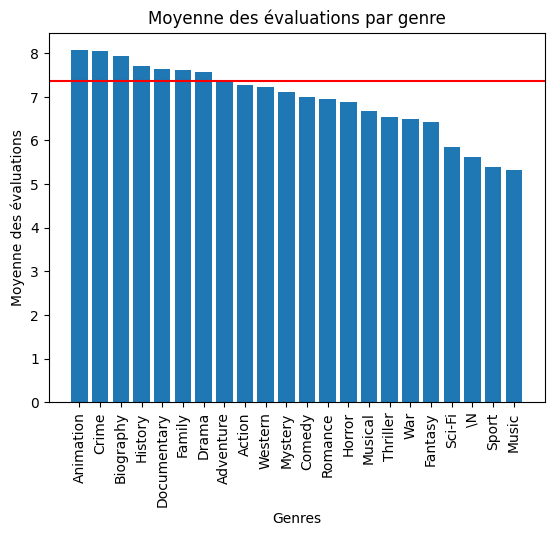

In [ ]:
#AverageRating mean, round with 1 decimal, using the weighted average
avg_rating_movie = np.average(df_movie['averageRating'], weights=df_movie['numVotes'])

round(avg_rating_movie, 1)


#Creating viz

plt.bar(avg_rating_genre_sorted.index, avg_rating_genre_sorted)

plt.axhline(avg_rating_movie, color='red', linestyle='-', label='AverageRating mean')


plt.title('Moyenne des évaluations par genre')
plt.xlabel('Genres')
plt.ylabel('Moyenne des évaluations')


plt.xticks(rotation=90)


plt.show()

In [ ]:
df_movie.head()

,tconst,isAdult,startYear,runtimeMinutes,genre_1,genre_2,genre_3,directors,title,averageRating,numVotes,primaryName
0,tt0036606,0,1983,118,Drama,War,None,nm0705535,Les Coeurs captifs,6.5,338,Michael Radford
1,tt0087803,0,1984,113,Drama,Sci-Fi,None,nm0705535,1984,7.1,74840,Michael Radford
2,tt0094317,0,1987,107,Crime,Drama,Mystery,nm0705535,Sur la route de Nairobi,6.4,2966,Michael Radford
3,tt0038687,0,1980,58,Documentary,War,None,nm0001379,Que la lumière soit,7.4,1941,John Huston
4,tt0065950,0,1970,120,Crime,Drama,Thriller,nm0001379,La lettre du Kremlin,6.2,2206,John Huston


## Nombre films produits par années et par genre

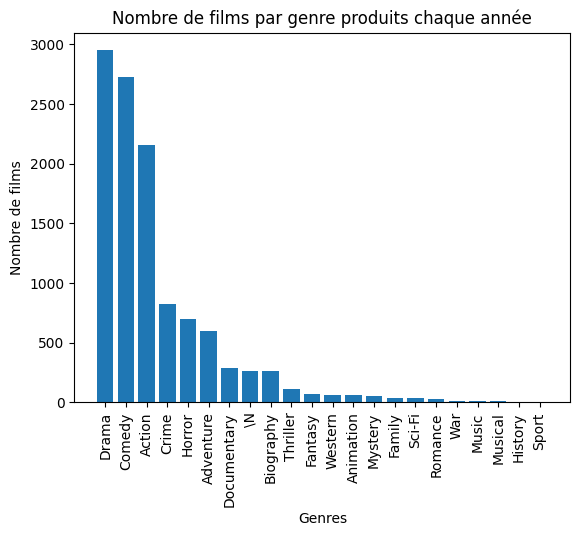

In [ ]:
##Creating viz

films_per_genre_prod = df_movie.groupby('genre_1')['startYear'].count()

films_per_genre_prod = films_per_genre_prod.sort_values(ascending = False)



plt.bar(films_per_genre_prod.index, films_per_genre_prod)


plt.title('Nombre de films par genre produits chaque année')
plt.xlabel('Genres')
plt.ylabel('Nombre de films')


plt.xticks(rotation=90)


plt.show()

## Films les mieux notés tout genre confondus 

In [ ]:
#Creating viz

from IPython.display import display
pd.set_option('display.max_rows', None)

# Trier les films par note moyenne en ordre décroissant
q3_numVotes = df_movie['numVotes'].quantile(0.75)
df_filtered = df_movie.loc[df_movie['numVotes'] >= q3_numVotes]
df_top_50_all_genres = df_filtered.sort_values('averageRating', ascending=False).head(50)

df_top_50_selected = df_top_50_all_genres.loc[:, ['title', 'averageRating', 'numVotes','tconst', 'startYear', 'genre_1']]
display(df_top_50_selected)

,title,averageRating,numVotes,tconst,startYear,genre_1
3957,Le Parrain,9.2,1906999,tt0068646,1972,Crime
3959,"Le Parrain, 2ᵉ partie",9.0,1299519,tt0071562,1974,Crime
3435,Vol au-dessus d'un nid de coucou,8.7,1027851,tt0073486,1975,Drama
3758,Les affranchis,8.7,1190129,tt0099685,1990,Biography
5438,Star Wars: Épisode V - L'Empire contre-attaque,8.7,1319730,tt0080684,1980,Action
6477,Qui chante là-bas?,8.7,15977,tt0076276,1980,Adventure
8737,Shoah,8.7,9894,tt0090015,1985,Documentary
2842,Le cinquième sceau,8.6,5181,tt0075467,1976,Drama
4267,Pink Floyd à Pompéi,8.6,9404,tt0069090,1972,Documentary
5139,Stop Making Sense,8.6,16112,tt0088178,1984,Documentary


## Films les mieux notés par genre

In [ ]:
#Creating viz

from IPython.display import display
pd.set_option('display.max_rows', None)

# Trier les films par genre et note moyenne en ordre décroissant pour chaque groupe
df_top_5_by_genre = df_filtered.groupby('genre_1').apply(lambda x: x.nlargest(5, 'numVotes')).reset_index(drop=True)

df_top_5_selected = df_top_5_by_genre.loc[:, ['title', 'averageRating', 'numVotes', 'tconst', 'startYear', 'genre_1']]
display(df_top_5_selected)

,title,averageRating,numVotes,tconst,startYear,genre_1
0,"Star Wars: Épisode IV, la guerre des étoiles",8.6,1392252,tt0076759,1977,Action
1,Star Wars: Épisode V - L'Empire contre-attaque,8.7,1319730,tt0080684,1980,Action
2,Le Retour du Jedi,8.3,1076506,tt0086190,1983,Action
3,Indiana Jones et les Aventuriers de l'arche pe...,8.4,985248,tt0082971,1981,Action
4,Piège de cristal,8.2,900656,tt0095016,1988,Action
5,Retour vers le futur,8.5,1237120,tt0088763,1985,Adventure
6,Les Dents de la mer,8.1,623066,tt0073195,1975,Adventure
7,Retour vers le futur II,7.8,547606,tt0096874,1989,Adventure
8,Retour vers le futur III,7.4,460164,tt0099088,1990,Adventure
9,Princess Bride,8.0,435787,tt0093779,1987,Adventure


## Acteurs présents dans les films les + aimés

In [ ]:

## Definir un nombre de vote pour dire qu'un film est populaire
q3_numVotes = df_movie['numVotes'].quantile(0.75)

## Keep only films with numVotes greater than 3rd quantile 
df_movie = df_movie.loc[df_movie["numVotes"] >= q3_numVotes, :]

## Sorted df on average rating desc
df_movie_averageRating_desc = df_movie.sort_values(by='averageRating', ascending=False)

## TOP 10 of best rated films
df_movie_top10 = df_movie_averageRating_desc.head(10)

## Get the film tconst in a list to find the actors in another table
list_tconst_top10 = df_movie_top10["tconst"].to_list()

## Actors having a role in the top 10 films
df_actor_top10 = df_actor.loc[df_actor[['film_1', 'film_2', 'film_3', 'film_4', 'film_5', 'film_6']].apply
                            (lambda row: row.isin(list_tconst_top10).any(), axis=1)]

## List of Actors having a role in the top 10 films
display(df_actor_top10["primaryName"].to_list())
##### 365 actors for the top 10 film, can't really use it #####




KeyboardInterrupt: 

## Directeurs des 10 films les plus populaire

In [ ]:
## List of directors from top 10 films
display(df_movie_top10["primaryName"].to_list())

In [ ]:
display(df_movie)

,tconst,isAdult,startYear,runtimeMinutes,genre_1,genre_2,genre_3,directors,title,averageRating,numVotes,primaryName
1,tt0087803,0,1984,113,Drama,Sci-Fi,None,nm0705535,1984,7.1,74840,Michael Radford
2,tt0094317,0,1987,107,Crime,Drama,Mystery,nm0705535,Sur la route de Nairobi,6.4,2966,Michael Radford
5,tt0068575,0,1972,96,Drama,Sport,None,nm0001379,La dernière chance,7.3,9808,John Huston
6,tt0068853,0,1972,120,Comedy,Drama,Romance,nm0001379,Juge et hors-la-loi,6.9,8895,John Huston
7,tt0070351,0,1973,98,Thriller,None,None,nm0001379,Le piège,6.3,4875,John Huston
8,tt0073341,0,1975,129,Adventure,War,None,nm0001379,L'homme qui voulut être roi,7.8,50460,John Huston
9,tt0080140,0,1979,106,Comedy,Drama,None,nm0001379,Le malin,6.9,6119,John Huston
11,tt0083284,0,1981,116,Drama,Sport,War,nm0001379,À nous la victoire,6.6,32038,John Huston
12,tt0083564,0,1982,126,Comedy,Drama,Family,nm0001379,Annie,6.6,47353,John Huston
13,tt0088322,0,1984,112,Drama,None,None,nm0001379,Au-dessous du volcan,6.9,5928,John Huston
